In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
data = pd.read_csv("/content/reference_library.txt")

In [ ]:
data.shape
data.head()

,COC(=O)C1=CC=CC2=C1C(=O)C1=CC([N+](=O)[O-])=CC=C21
0,CN(C)CCC1=CN(C)C2=CC=C(O)C=C12
1,CC1=C(S(=O)(=O)N2CCCCC2)C2=C(S1)N=CN(CC(=O)N1C...
2,CN(C)CCOC1=CC=C(C(=O)/C=C/C2=CC=C(OC3=CC=CC=C3...
3,O=C(CCC1=COC2=CC=CC(OCC3CCCCC3)=C2C1=O)C1=CC=C...
4,CC1=CC=C(COC2=NN(CN3CCOCC3)C(=S)N2/N=C/C2=CNN=...


In [ ]:
data.rename(columns={'COC(=O)C1=CC=CC2=C1C(=O)C1=CC([N+](=O)[O-])=CC=C21': 'SMILES'}, inplace=True)
data.loc[len(data)] = ['COC(=O)C1=CC=CC2=C1C(=O)C1=CC([N+](=O)[O-])=CC=C21']
data.to_csv('SMILES_added.csv', index=False)
data

,SMILES
0,CN(C)CCC1=CN(C)C2=CC=C(O)C=C12
1,CC1=C(S(=O)(=O)N2CCCCC2)C2=C(S1)N=CN(CC(=O)N1C...
2,CN(C)CCOC1=CC=C(C(=O)/C=C/C2=CC=C(OC3=CC=CC=C3...
3,O=C(CCC1=COC2=CC=CC(OCC3CCCCC3)=C2C1=O)C1=CC=C...
4,CC1=CC=C(COC2=NN(CN3CCOCC3)C(=S)N2/N=C/C2=CNN=...
...,...
1172149,CCCC1=NC=C(CC2=CN=C3C=CC(O)=CC3=C2)C2=CC(OC)=C...
1172150,CN(C)C(=O)OC1=CC=C(C[C@H](NC(=O)[C@@H]2CCCN2S(...
1172151,CC1=CC=CC(N(C)S(=O)(=O)C2=CC=CC3=NSN
1172152,COC(=O)C1=CC=CC2=C1C(=O)C1=CC([N+](=O)[O-])=CC...


In [ ]:
def is_processable_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return True
        else:
            return False
    except Exception as e:
        print("Error:", e)
        return False

In [ ]:
data['vali'] = data['SMILES'].apply(lambda x: is_processable_smiles(x))
data[data['vali']]

In [ ]:
# Randomly choose 800 SMILES
sampled_df = data.sample(n=800, random_state=42)

In [ ]:
def get_inchikey_and_canonical_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None
    else:
        # Generate canonical SMILES
        canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=False)

        # Generate InChIKey
        inchi_key = Chem.InchiToInchiKey(Chem.MolToInchi(mol))

        return inchi_key, canonical_smiles

# Apply the function to each row and create new DataFrame
result_df = sampled_df.apply(lambda row: pd.Series(get_inchikey_and_canonical_smiles(row['SMILES']), index=['InChIKey', 'Canonical_SMILES']), axis=1)

# Concatenate the new DataFrame with the original DataFrame
result_df = pd.concat([sampled_df, result_df], axis=1)

# Print or manipulate the DataFrame as needed
print(result_df)


In [ ]:
# Delete column vali
result_df.drop(columns=['vali'], inplace=True)

In [ ]:
result_df

,SMILES,InChIKey,Canonical_SMILES
980930,O=S(=O)(C1=CC=CC=C1)N1CCC2(CCN(C3=CC=NC=C3)CC2...,NMHMVZJUGHQUOC-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCC2(CCN(c3ccncc3)CC2)CC1
1075258,CC(=O)NC1=CC=C2C(=C1)CCC(=O)N2CC1=CC=C(C(O)(C(...,HXWWKRNBPHPUJI-UHFFFAOYSA-N,CC(=O)Nc1ccc2c(c1)CCC(=O)N2Cc1ccc(C(O)(C(F)(F)...
164186,COC12C(=O)C3=CC=CC=C3C(=O)C1C(C1=CC=C(OC(C)=O)...,IKFBIYTUJGKXMM-UHFFFAOYSA-N,COC12C(=O)c3ccccc3C(=O)C1C(c1ccc(OC(C)=O)c3ncc...
695708,CCOC(=O)CN1N=C(C2=CC=C(F)C=C2)C=C(CC2=CC=CC=C2...,NJKAHRXATNDZFD-UHFFFAOYSA-N,CCOC(=O)Cn1nc(-c2ccc(F)cc2)cc(Cc2ccccc2)c1=O
434562,NC1=NC2=CC=C(O)N=C2N1C1=CC=CC(F)=C1Cl,HPTVAYUYTIALTF-UHFFFAOYSA-N,Nc1nc2ccc(O)nc2n1-c1cccc(F)c1Cl
...,...,...,...
983884,CC1=C(OCC2=CC=CC=C2)C(=O)C=CN1[C@H]1CC[C@@H](C...,HVOGFZYOQKPAMT-DOTOQJQBSA-N,Cc1c(OCc2ccccc2)c(=O)ccn1C1CCC(CO)O1
267978,CCN(CC)C(=O)C1=CN=C2C=CC(C#CCNC(=O)C3=CN=CN(CC...,CSTXWDOYMRKUPT-UHFFFAOYSA-N,CCN(CC)C(=O)c1cnc2ccc(C#CCNC(=O)c3cncn(Cc4ccc(...
534346,CC[C@H](N[C@@H](CC(C)C)C(=O)N[C@@H](CC1=CC=C(O...,WKAFHMQHWQPVLN-OKZBNKHCSA-N,CCC(NC(CC(C)C)C(=O)NC(Cc1ccc(OC)cc1)C(=O)NC)P(...
1167466,CC[C@@H](NC(=O)C1=C2N(C(C(=O)N3CCC[C@@H]3C)=C1...,IBBNYQVPCFRLPB-MAUKXSAKSA-N,CCC(NC(=O)c1cc(C(=O)N2CCCC2C)n2c1SCC2)c1ccccc1


In [ ]:
result_df.to_csv('sampled_smiles.csv', index=False)

In [ ]:
# Define the filename
sdf_file = '/content/COCONUT_DB.sdf'
# Read the SDF file into a DataFrame using PandasTools
df = PandasTools.LoadSDF(sdf_file)
df

In [ ]:
df = df[['inchikey', 'SMILES', 'molecular_weight']]
df

,inchikey,SMILES,molecular_weight
1,FJEMIESGEMWDOB-UHFFFAOYSA-N,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,660.6463016716552
2,KLWKJVYCDFWQMK-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,598.5972923812595
3,PTEKHLCNKCAXPH-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,554.5446526448111
4,ZVAVQCZAGOKAMX-UHFFFAOYSA-N,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,534.6842258201034
5,UYIPOCQHTAYRMA-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,540.5180352403714
...,...,...,...
263169,SQMNNXMLQGQSJE-UHFFFAOYSA-N,OCC12C=CC3(C(=CCC4C5(C)CCC(O)C(C)(CO)C5CCC43C)...,488.7002577251248
263170,WEHHTBYCDXOFOS-UHFFFAOYSA-N,O=C(C=CC=1N=NC2=CC(OC)=C(OC)C=C2C1C=3OC(=CC3)C)C,338.35794173218574
263171,PQEUVMQCADMHBA-UHFFFAOYSA-N,O=C(OC)C=C(C)CCC1C(=C)CCC2C(=C)C(C)CCC12C,316.478367810112
263172,XVYSGUYPIMZAAK-UHFFFAOYSA-N,O=C(O)C(N=C(O)C(N=C(O)C=1C=CC=C(O)C1O)C)C(O)C,326.302477030954


In [ ]:
df['molecular_weight'] = df['molecular_weight'].astype(float)
filtered_df = df[df['molecular_weight'] <= 800]
filtered_df

<ipython-input-52-1cbac2ac777c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['molecular_weight'] = df['molecular_weight'].astype(float)


,inchikey,SMILES,molecular_weight
1,FJEMIESGEMWDOB-UHFFFAOYSA-N,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,660.646302
2,KLWKJVYCDFWQMK-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,598.597292
3,PTEKHLCNKCAXPH-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,554.544653
4,ZVAVQCZAGOKAMX-UHFFFAOYSA-N,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,534.684226
5,UYIPOCQHTAYRMA-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,540.518035
...,...,...,...
263169,SQMNNXMLQGQSJE-UHFFFAOYSA-N,OCC12C=CC3(C(=CCC4C5(C)CCC(O)C(C)(CO)C5CCC43C)...,488.700258
263170,WEHHTBYCDXOFOS-UHFFFAOYSA-N,O=C(C=CC=1N=NC2=CC(OC)=C(OC)C=C2C1C=3OC(=CC3)C)C,338.357942
263171,PQEUVMQCADMHBA-UHFFFAOYSA-N,O=C(OC)C=C(C)CCC1C(=C)CCC2C(=C)C(C)CCC12C,316.478368
263172,XVYSGUYPIMZAAK-UHFFFAOYSA-N,O=C(O)C(N=C(O)C(N=C(O)C=1C=CC=C(O)C1O)C)C(O)C,326.302477


In [ ]:
from rdkit import Chem

def is_processable_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return True
        else:
            return False
    except Exception as e:
        print("Error:", e)
        return False

In [ ]:
filtered_df['vali'] = filtered_df['SMILES'].apply(lambda x: is_processable_smiles(x))
filtered_df

<ipython-input-54-806f0937938c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['vali'] = filtered_df['SMILES'].apply(lambda x: is_processable_smiles(x))


,inchikey,SMILES,molecular_weight,vali
1,FJEMIESGEMWDOB-UHFFFAOYSA-N,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,660.646302,True
2,KLWKJVYCDFWQMK-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,598.597292,True
3,PTEKHLCNKCAXPH-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,554.544653,True
4,ZVAVQCZAGOKAMX-UHFFFAOYSA-N,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,534.684226,True
5,UYIPOCQHTAYRMA-UHFFFAOYSA-N,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,540.518035,True
...,...,...,...,...
263169,SQMNNXMLQGQSJE-UHFFFAOYSA-N,OCC12C=CC3(C(=CCC4C5(C)CCC(O)C(C)(CO)C5CCC43C)...,488.700258,True
263170,WEHHTBYCDXOFOS-UHFFFAOYSA-N,O=C(C=CC=1N=NC2=CC(OC)=C(OC)C=C2C1C=3OC(=CC3)C)C,338.357942,True
263171,PQEUVMQCADMHBA-UHFFFAOYSA-N,O=C(OC)C=C(C)CCC1C(=C)CCC2C(=C)C(C)CCC12C,316.478368,True
263172,XVYSGUYPIMZAAK-UHFFFAOYSA-N,O=C(O)C(N=C(O)C(N=C(O)C=1C=CC=C(O)C1O)C)C(O)C,326.302477,True


In [ ]:
# Randomly choose 800 SMILES
sampled_200 = filtered_df.sample(n=200, random_state=42)

In [ ]:
def get_inchikey_and_canonical_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None
    else:
        # Generate canonical SMILES
        canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=False)

        return canonical_smiles

# Apply the function to each row and create new DataFrame
result_200 = sampled_200.apply(lambda row: pd.Series(get_inchikey_and_canonical_smiles(row['SMILES']), index=['Canonical_SMILES']), axis=1)

# Concatenate the new DataFrame with the original DataFrame
result_200 = pd.concat([sampled_200, result_200], axis=1)

# Print or manipulate the DataFrame as needed
print(result_200)

                           inchikey  \
65791   ZHOWBEMYNKDACZ-UHFFFAOYSA-N   
71040   DZXBZPMJYIXTTI-UHFFFAOYSA-N   
193610  ZJXKTVUAHFZXJL-UHFFFAOYSA-N   
70890   RHKSTEXGTKQZCR-UHFFFAOYSA-N   
194602  VXFDCSUPHHGDMV-UHFFFAOYSA-N   
...                             ...   
74070   OHJPJQQNUYRBJC-UHFFFAOYSA-N   
110151  CSLDLWZJSCNZPW-UHFFFAOYSA-N   
235256  ZXYJHHCDYJHFRI-UHFFFAOYSA-N   
181401  ZBDIHBZTASPJMQ-UHFFFAOYSA-N   
173724  SQRNWQJETGUHKY-UHFFFAOYSA-N   

                                                   SMILES  molecular_weight  \
65791   O=C(OC1C(O)CC2(C)C(C(=C)CCC2C1(C)CO)CCC3=COC=C...        416.551289   
71040                              O=C(OCCCCCCCCCCCCC=C)C        254.408807   
193610  O=C(O)C1=CC(OC2OC(C(O)C(O)C2O)C3(O)CCCC3)=C4C(...        492.473457   
70890   O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4CC5OC65C(O)C=C...        528.634946   
194602  O=C1C=C2C(=CC=C1NCCCC(=O)NCCCCCC(=O)OC)C3=C(OC...        597.700350   
...                                                   ...

In [ ]:
result_200

,inchikey,SMILES,molecular_weight,vali,Canonical_SMILES
65791,ZHOWBEMYNKDACZ-UHFFFAOYSA-N,O=C(OC1C(O)CC2(C)C(C(=C)CCC2C1(C)CO)CCC3=COC=C...,416.551289,True,C=C1CCC2C(C)(CC(O)C(OC(=O)C(C)=CC)C2(C)CO)C1CC...
71040,DZXBZPMJYIXTTI-UHFFFAOYSA-N,O=C(OCCCCCCCCCCCCC=C)C,254.408807,True,C=CCCCCCCCCCCCCOC(C)=O
193610,ZJXKTVUAHFZXJL-UHFFFAOYSA-N,O=C(O)C1=CC(OC2OC(C(O)C(O)C2O)C3(O)CCCC3)=C4C(...,492.473457,True,CC(=O)c1c(C)c(O)c2cc(C(=O)O)cc(OC3OC(C4(O)CCCC...
70890,RHKSTEXGTKQZCR-UHFFFAOYSA-N,O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4CC5OC65C(O)C=C...,528.634946,True,CC(=O)OCC12CCC3C(CC4OC45C(O)C=CC(=O)C35C)C1CC(...
194602,VXFDCSUPHHGDMV-UHFFFAOYSA-N,O=C1C=C2C(=CC=C1NCCCC(=O)NCCCCCC(=O)OC)C3=C(OC...,597.700350,True,COC(=O)CCCCCNC(=O)CCCNc1ccc2c(cc1=O)C(NC(C)=O)...
...,...,...,...,...,...
74070,OHJPJQQNUYRBJC-UHFFFAOYSA-N,O=C(O)C1(C)CCCC2(C)C1C(O)C(O)C34C(=O)C(C)C(CCC...,366.449370,True,CC1C(=O)C23CC1CCC2(O)C1(C)CCCC(C)(C(=O)O)C1C(O...
110151,CSLDLWZJSCNZPW-UHFFFAOYSA-N,O=C1C=C(N=C2C(O)=C(C=CN12)CN3CCOCC3)C,275.303620,True,Cc1cc(=O)n2ccc(CN3CCOCC3)c(O)c2n1
235256,ZXYJHHCDYJHFRI-UHFFFAOYSA-N,O=C(OC1C(N(C(=O)C=2C=CC=CC2)C)CCC3(C)C1CCC4C5C...,538.762348,True,CC(=O)OC1C(N(C)C(=O)c2ccccc2)CCC2(C)C3CC(O)C4(...
181401,ZBDIHBZTASPJMQ-UHFFFAOYSA-N,O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4(O)CC=C5CC=CC(...,470.598783,True,CC1=C(C)C(=O)OC(C(C)C2C(O)CC3C2(C)CC(O)C2C4(C)...


In [ ]:
# Delete column vali
result_200.drop(columns=result_200[['vali', 'molecular_weight']], inplace=True)

In [ ]:
result_200

,inchikey,SMILES,Canonical_SMILES
65791,ZHOWBEMYNKDACZ-UHFFFAOYSA-N,O=C(OC1C(O)CC2(C)C(C(=C)CCC2C1(C)CO)CCC3=COC=C...,C=C1CCC2C(C)(CC(O)C(OC(=O)C(C)=CC)C2(C)CO)C1CC...
71040,DZXBZPMJYIXTTI-UHFFFAOYSA-N,O=C(OCCCCCCCCCCCCC=C)C,C=CCCCCCCCCCCCCOC(C)=O
193610,ZJXKTVUAHFZXJL-UHFFFAOYSA-N,O=C(O)C1=CC(OC2OC(C(O)C(O)C2O)C3(O)CCCC3)=C4C(...,CC(=O)c1c(C)c(O)c2cc(C(=O)O)cc(OC3OC(C4(O)CCCC...
70890,RHKSTEXGTKQZCR-UHFFFAOYSA-N,O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4CC5OC65C(O)C=C...,CC(=O)OCC12CCC3C(CC4OC45C(O)C=CC(=O)C35C)C1CC(...
194602,VXFDCSUPHHGDMV-UHFFFAOYSA-N,O=C1C=C2C(=CC=C1NCCCC(=O)NCCCCCC(=O)OC)C3=C(OC...,COC(=O)CCCCCNC(=O)CCCNc1ccc2c(cc1=O)C(NC(C)=O)...
...,...,...,...
74070,OHJPJQQNUYRBJC-UHFFFAOYSA-N,O=C(O)C1(C)CCCC2(C)C1C(O)C(O)C34C(=O)C(C)C(CCC...,CC1C(=O)C23CC1CCC2(O)C1(C)CCCC(C)(C(=O)O)C1C(O...
110151,CSLDLWZJSCNZPW-UHFFFAOYSA-N,O=C1C=C(N=C2C(O)=C(C=CN12)CN3CCOCC3)C,Cc1cc(=O)n2ccc(CN3CCOCC3)c(O)c2n1
235256,ZXYJHHCDYJHFRI-UHFFFAOYSA-N,O=C(OC1C(N(C(=O)C=2C=CC=CC2)C)CCC3(C)C1CCC4C5C...,CC(=O)OC1C(N(C)C(=O)c2ccccc2)CCC2(C)C3CC(O)C4(...
181401,ZBDIHBZTASPJMQ-UHFFFAOYSA-N,O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4(O)CC=C5CC=CC(...,CC1=C(C)C(=O)OC(C(C)C2C(O)CC3C2(C)CC(O)C2C4(C)...


In [ ]:
result_200.rename(columns={'inchikey': 'InChIKey'}, inplace=True)

In [ ]:
result_200

,InChIKey,SMILES,Canonical_SMILES
65791,ZHOWBEMYNKDACZ-UHFFFAOYSA-N,O=C(OC1C(O)CC2(C)C(C(=C)CCC2C1(C)CO)CCC3=COC=C...,C=C1CCC2C(C)(CC(O)C(OC(=O)C(C)=CC)C2(C)CO)C1CC...
71040,DZXBZPMJYIXTTI-UHFFFAOYSA-N,O=C(OCCCCCCCCCCCCC=C)C,C=CCCCCCCCCCCCCOC(C)=O
193610,ZJXKTVUAHFZXJL-UHFFFAOYSA-N,O=C(O)C1=CC(OC2OC(C(O)C(O)C2O)C3(O)CCCC3)=C4C(...,CC(=O)c1c(C)c(O)c2cc(C(=O)O)cc(OC3OC(C4(O)CCCC...
70890,RHKSTEXGTKQZCR-UHFFFAOYSA-N,O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4CC5OC65C(O)C=C...,CC(=O)OCC12CCC3C(CC4OC45C(O)C=CC(=O)C35C)C1CC(...
194602,VXFDCSUPHHGDMV-UHFFFAOYSA-N,O=C1C=C2C(=CC=C1NCCCC(=O)NCCCCCC(=O)OC)C3=C(OC...,COC(=O)CCCCCNC(=O)CCCNc1ccc2c(cc1=O)C(NC(C)=O)...
...,...,...,...
74070,OHJPJQQNUYRBJC-UHFFFAOYSA-N,O=C(O)C1(C)CCCC2(C)C1C(O)C(O)C34C(=O)C(C)C(CCC...,CC1C(=O)C23CC1CCC2(O)C1(C)CCCC(C)(C(=O)O)C1C(O...
110151,CSLDLWZJSCNZPW-UHFFFAOYSA-N,O=C1C=C(N=C2C(O)=C(C=CN12)CN3CCOCC3)C,Cc1cc(=O)n2ccc(CN3CCOCC3)c(O)c2n1
235256,ZXYJHHCDYJHFRI-UHFFFAOYSA-N,O=C(OC1C(N(C(=O)C=2C=CC=CC2)C)CCC3(C)C1CCC4C5C...,CC(=O)OC1C(N(C)C(=O)c2ccccc2)CCC2(C)C3CC(O)C4(...
181401,ZBDIHBZTASPJMQ-UHFFFAOYSA-N,O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4(O)CC=C5CC=CC(...,CC1=C(C)C(=O)OC(C(C)C2C(O)CC3C2(C)CC(O)C2C4(C)...


In [ ]:
result_200.to_csv('final_200.csv', index=False)

In [ ]:
combined_df = pd.concat([result_df, result_200], ignore_index=True)

# Print or manipulate the combined DataFrame as needed
print(combined_df)

                                                SMILES  \
0    O=S(=O)(C1=CC=CC=C1)N1CCC2(CCN(C3=CC=NC=C3)CC2...   
1    CC(=O)NC1=CC=C2C(=C1)CCC(=O)N2CC1=CC=C(C(O)(C(...   
2    COC12C(=O)C3=CC=CC=C3C(=O)C1C(C1=CC=C(OC(C)=O)...   
3    CCOC(=O)CN1N=C(C2=CC=C(F)C=C2)C=C(CC2=CC=CC=C2...   
4                NC1=NC2=CC=C(O)N=C2N1C1=CC=CC(F)=C1Cl   
..                                                 ...   
995  O=C(O)C1(C)CCCC2(C)C1C(O)C(O)C34C(=O)C(C)C(CCC...   
996              O=C1C=C(N=C2C(O)=C(C=CN12)CN3CCOCC3)C   
997  O=C(OC1C(N(C(=O)C=2C=CC=CC2)C)CCC3(C)C1CCC4C5C...   
998  O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4(O)CC=C5CC=CC(...   
999  O=C(OC1C(=CC2OC(=O)C3(OC23C(OC(=O)C)C4C(O)(C)C...   

                        InChIKey  \
0    NMHMVZJUGHQUOC-UHFFFAOYSA-N   
1    HXWWKRNBPHPUJI-UHFFFAOYSA-N   
2    IKFBIYTUJGKXMM-UHFFFAOYSA-N   
3    NJKAHRXATNDZFD-UHFFFAOYSA-N   
4    HPTVAYUYTIALTF-UHFFFAOYSA-N   
..                           ...   
995  OHJPJQQNUYRBJC-UHFFFAOYSA-N   
996  CSLDLWZJSC

In [ ]:
combined_df

,SMILES,InChIKey,Canonical_SMILES
0,O=S(=O)(C1=CC=CC=C1)N1CCC2(CCN(C3=CC=NC=C3)CC2...,NMHMVZJUGHQUOC-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCC2(CCN(c3ccncc3)CC2)CC1
1,CC(=O)NC1=CC=C2C(=C1)CCC(=O)N2CC1=CC=C(C(O)(C(...,HXWWKRNBPHPUJI-UHFFFAOYSA-N,CC(=O)Nc1ccc2c(c1)CCC(=O)N2Cc1ccc(C(O)(C(F)(F)...
2,COC12C(=O)C3=CC=CC=C3C(=O)C1C(C1=CC=C(OC(C)=O)...,IKFBIYTUJGKXMM-UHFFFAOYSA-N,COC12C(=O)c3ccccc3C(=O)C1C(c1ccc(OC(C)=O)c3ncc...
3,CCOC(=O)CN1N=C(C2=CC=C(F)C=C2)C=C(CC2=CC=CC=C2...,NJKAHRXATNDZFD-UHFFFAOYSA-N,CCOC(=O)Cn1nc(-c2ccc(F)cc2)cc(Cc2ccccc2)c1=O
4,NC1=NC2=CC=C(O)N=C2N1C1=CC=CC(F)=C1Cl,HPTVAYUYTIALTF-UHFFFAOYSA-N,Nc1nc2ccc(O)nc2n1-c1cccc(F)c1Cl
...,...,...,...
995,O=C(O)C1(C)CCCC2(C)C1C(O)C(O)C34C(=O)C(C)C(CCC...,OHJPJQQNUYRBJC-UHFFFAOYSA-N,CC1C(=O)C23CC1CCC2(O)C1(C)CCCC(C)(C(=O)O)C1C(O...
996,O=C1C=C(N=C2C(O)=C(C=CN12)CN3CCOCC3)C,CSLDLWZJSCNZPW-UHFFFAOYSA-N,Cc1cc(=O)n2ccc(CN3CCOCC3)c(O)c2n1
997,O=C(OC1C(N(C(=O)C=2C=CC=CC2)C)CCC3(C)C1CCC4C5C...,ZXYJHHCDYJHFRI-UHFFFAOYSA-N,CC(=O)OC1C(N(C)C(=O)c2ccccc2)CCC2(C)C3CC(O)C4(...
998,O=C1OC(CC(=C1C)C)C(C)C2C(O)CC3C4(O)CC=C5CC=CC(...,ZBDIHBZTASPJMQ-UHFFFAOYSA-N,CC1=C(C)C(=O)OC(C(C)C2C(O)CC3C2(C)CC(O)C2C4(C)...


In [ ]:
combined_df.to_csv('Validation.csv', index=False)

In [28]:
import numpy as np
from rdkit.Chem import AllChem

smiles = combined_df['Canonical_SMILES']
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
# Filter out None molecules
valid_mols = [mol for mol in mols if mol is not None]

# Specify the radius and number of bits for Morgan fingerprint
radius = 3
nBits = 2048

# Generate Morgan fingerprints for valid molecules
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits) for mol in valid_mols]
morgan_fps_train = [np.array(list(fp.ToBitString())).astype(int) for fp in fps]


In [29]:
morgan_fps_train

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [30]:
combined_df['Fingerprints'] = morgan_fps_train

In [31]:
combined_df

,SMILES,InChIKey,Canonical_SMILES,Fingerprints
846624,O=CC1=CN2C3=C1C=CC1=C3N(C3=CC=CC=C13)CC(OCCN1C...,LNVSWKMRGVHFQH-UHFFFAOYSA-N,O=Cc1cn2c3c1ccc1c4ccccc4n(c13)CC(OCCN1CCCC1)C2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."
827633,FC1=CC(F)=C2N=C(N3CCOCC3)SC2=C1,KCOMKBVTTUVWAR-UHFFFAOYSA-N,Fc1cc(F)c2nc(N3CCOCC3)sc2c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
985460,CCOP(C)(=S)SCC(=O)NC(C)(CC)C(=O)O,CIVTVHHIIZUTGC-UHFFFAOYSA-N,CCOP(C)(=S)SCC(=O)NC(C)(CC)C(=O)O,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1341588,NC1=NC=NC2=C1N=CN2CC1=CC=C(CN2C=NC3=C(N)N=CN=C...,ZFWVUUNTIXFIEM-UHFFFAOYSA-N,Nc1ncnc2c1ncn2Cc1ccc(Cn2cnc3c(N)ncnc32)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
611367,CCCCCCCCN(C)C(=O)CN1C=C(CC2=CN(CC)C(=O)N=C2)C(...,SPJIPWQWZQJJNL-UHFFFAOYSA-N,CCCCCCCCN(C)C(=O)Cn1cc(Cc2cnc(=O)n(CC)c2)c(=O)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
404816,O=C(NC1=CC=C(C2CCNC2)C=C1)OC1CC2=CC=CC=C2C1,FCNLZUJBRFYADI-UHFFFAOYSA-N,O=C(Nc1ccc(C2CCNC2)cc1)OC1Cc2ccccc2C1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
224301,NC1=NC=C(C2=CC=C(OC3=CC=CC=C3)C=C2)C2=C1C(C1=C...,MRGGMXQUCMYMCG-UHFFFAOYSA-N,Nc1ncc(-c2ccc(Oc3ccccc3)cc2)c2scc(-c3ccc(Oc4cc...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
105421,CC(C)(O)C1=CC=C(CO)C(O[C@@H]2O[C@H](CO)[C@@H](...,GXHWGRRVBLBEBG-UXXRCYHCSA-N,CC(C)(O)c1ccc(CO)c(OC2OC(CO)C(O)C(O)C2O)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
174191,Cl.ClC1=CC=CC=C1COC1(C2=NCCN2)COC2=CC=CC=C2O1,RYKXJTFFPOGASP-UHFFFAOYSA-N,Cl.Clc1ccccc1COC1(C2=NCCN2)COc2ccccc2O1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [32]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=5c7dd58c8f31a8ea937d59387e809524e7405817558beb91fbf74daf1b13e7d0
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


<ipython-input-33-11d611b1b51b>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='viridis')


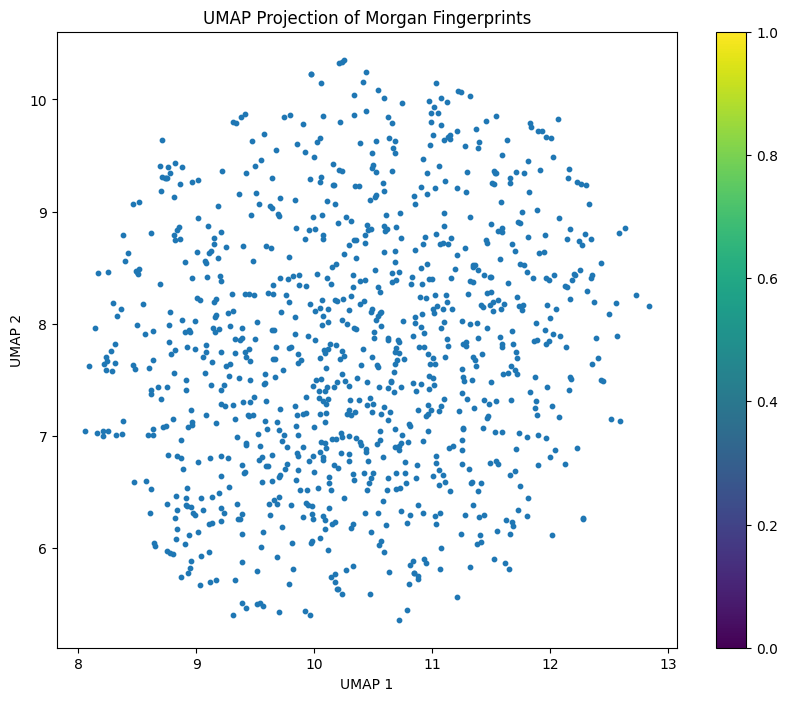

In [33]:
import umap
import matplotlib.pyplot as plt

# Assuming morgan_fps_train is your array of Morgan fingerprints
# Reduce the dimensionality of the fingerprints to 2D using UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(morgan_fps_train)

# Plot the UMAP embedding
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='viridis')
plt.title('UMAP Projection of our dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()


<ipython-input-34-7d8f96e6139a>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='viridis')


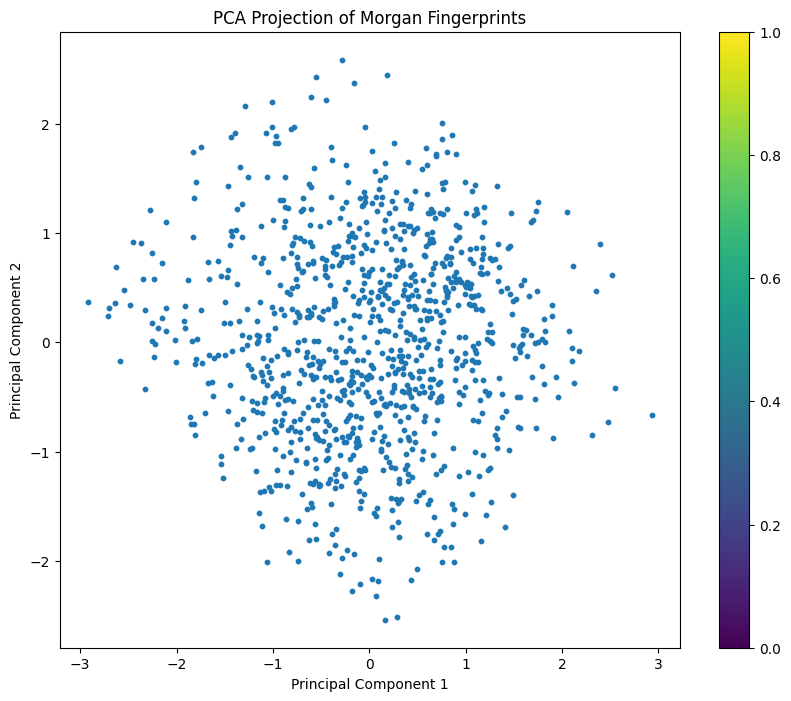

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming morgan_fps_train is your array of Morgan fingerprints
# Reduce the dimensionality of the fingerprints to 2D using PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(morgan_fps_train)

# Plot the PCA embedding
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='viridis')
plt.title('PCA Projection of Morgan Fingerprints')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
